In [1]:
import numpy as np
import cv2
import os

In [2]:
file_paths = []
mydir = './Pashto/'
for file_name in os.listdir(mydir):
    file_path = os.path.join(mydir, file_name)
    file_paths.append(file_path)
print(file_paths)

['./Pashto/01', './Pashto/02', './Pashto/03', './Pashto/04', './Pashto/05', './Pashto/06', './Pashto/07', './Pashto/08', './Pashto/09', './Pashto/10', './Pashto/11', './Pashto/12', './Pashto/13', './Pashto/14', './Pashto/15', './Pashto/16', './Pashto/17', './Pashto/18', './Pashto/19', './Pashto/20', './Pashto/21', './Pashto/22', './Pashto/23', './Pashto/24', './Pashto/25', './Pashto/26', './Pashto/27', './Pashto/28', './Pashto/29', './Pashto/30', './Pashto/31', './Pashto/32', './Pashto/33', './Pashto/34', './Pashto/35', './Pashto/36', './Pashto/37', './Pashto/38', './Pashto/39', './Pashto/40', './Pashto/41', './Pashto/42', './Pashto/43']


In [3]:
X = []
y = []
i = -1
for file_path in file_paths:
    i += 1
    #tmp = np.zeros(43)
    #tmp[i] = 1
    for fileName in os.listdir(file_path):
        img = cv2.imread(os.path.join(file_path, fileName))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is not None:
            X.append(img)
            #y.append(tmp)
            y.append(i)
X = np.array(X)
y = np.array(y)
X.shape
y.shape

(238650,)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190920, 28, 28) (190920,) (47730, 28, 28) (47730,)


In [5]:
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 4 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024),])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 4 Logical GPUs


In [6]:
from keras.utils import to_categorical

train_images = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
train_images = train_images.astype('float32') / 255

test_images = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
2984/2984 [==============================] - 79s 11ms/step - loss: 0.7802 - accuracy: 0.7397
Epoch 2/10
2984/2984 [==============================] - 30s 10ms/step - loss: 0.2991 - accuracy: 0.8958
Epoch 3/10
2984/2984 [==============================] - 30s 10ms/step - loss: 0.2067 - accuracy: 0.9279
Epoch 4/10
2984/2984 [==============================] - 30s 10ms/step - loss: 0.1629 - accuracy: 0.9425
Epoch 5/10
2984/2984 [==============================] - 30s 10ms/step - loss: 0.1363 - accuracy: 0.9528
Epoch 6/10
2984/2984 [==============================] - 31s 10ms/step - loss: 0.1199 - accuracy: 0.9587
Epoch 7/10
2984/2984 [==============================] - 30s 10ms/step - loss: 0.1092 - accuracy: 0.9630
Epoch 8/10
2984/2984 [==============================] - 30s 10ms/step - loss: 0.1020 - accuracy: 0.9656
Epoch 9/10
2984/2984 [==============================] - 30s 10ms/step - loss: 0.0984 - accuracy: 0.9680
Epoch 10/10
2984/2984 [==============================] - 32s 11m

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

1492/1492 [==============================] - 6s 4ms/step - loss: 0.1760 - accuracy: 0.9452


0.9452335834503174

In [11]:
model.save('phasto.h5')

In [12]:
y_test_proba = model.predict(test_images)
y_pred_test = np.argmax(y_test_proba,axis=1)

1492/1492 [==============================] - 3s 2ms/step


In [13]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_pred_test, y_test)
test_acc

0.945233605698722

In [14]:
from matplotlib import pyplot as plt
classes = []
for i in range(43):
    classes.append(i + 1)
def show_confusion_matrix(y_true, y_pred, classes=classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='pred')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 43)), labels=classes,rotation = 90)
    plt.yticks(list(range(0, 43)), labels=classes)
    plt.colorbar(ctx)
    plt.savefig("EN_ConMat_test.png")
    plt.show()

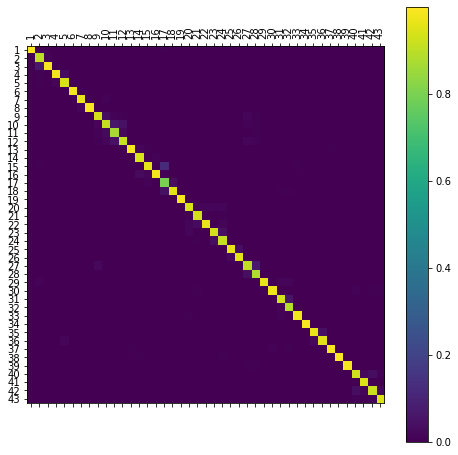

In [15]:
show_confusion_matrix(y_test, y_pred_test)